In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
#-*- coding: utf-8 -*-

In [58]:
frame = pd.read_excel('EV_rawdata.xlsx', 'Sheet1')

#### 시도별 인구수

In [59]:
p_frame = pd.read_excel('2018.xlsx',)

In [60]:
p_frame.head()

,총인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
강원도,1529517,112624,149844,182184,174019,231438,268338,204719,135344,61700,9056,251
경기도,12962945,1209048,1381418,1740431,1935410,2266960,2116195,1272503,703185,296357,40410,1028
경상남도,3353810,296562,345595,393081,438438,547753,574318,401989,231658,110478,13669,269
경상북도,2659325,207551,244857,299024,317076,395937,463178,362578,233784,119425,15525,390
광주광역시,1450304,131232,171725,205127,199123,244252,229054,143974,86404,34695,4586,132


In [61]:
p_frame['PopOfAdult'] = p_frame['총인구수']-(p_frame['0~9세']+p_frame['10~19세'])

In [62]:
frame['PopPerEV'] = frame['EV']/p_frame['PopOfAdult'].values*100

In [63]:
frame

,area,Charger,RapidCharger,RatioOfRC,EV,PopPerEV
0,강원도,620,420,67.7,1260,0.099444
1,경기도,1782,780,43.7,5672,0.054683
2,경상남도,604,317,52.4,1848,0.068150
3,경상북도,798,457,57.2,1895,0.085866
4,광주광역시,372,126,33.8,1552,0.135269
5,대구광역시,600,264,44.0,6738,0.337112
6,대전광역시,223,102,45.7,1400,0.117602
7,부산광역시,342,121,35.3,1516,0.053065
8,서울특별시,1211,425,35.0,11580,0.143738
9,세종특별자치시,71,32,45.0,234,0.100895


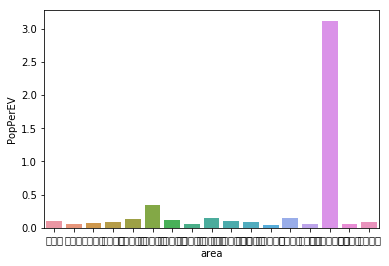

In [64]:
sns.barplot(x='area', y='PopPerEV', data=frame)

### [Theory 1]<br>전기차 대수 대비 충전기 비율이 높은 지역의 전기차 보급률이 높을 것이다.

#### 1.1 Data Processing

In [65]:
frame_1 = pd.DataFrame(frame, columns = ['area', 'Charger', 'EV'])

In [66]:
frame_1['ChargerPerVehicle'] = frame_1['Charger']/frame_1['EV']*100

In [67]:
frame_1

,area,Charger,EV,ChargerPerVehicle
0,강원도,620,1260,49.206349
1,경기도,1782,5672,31.417489
2,경상남도,604,1848,32.683983
3,경상북도,798,1895,42.110818
4,광주광역시,372,1552,23.969072
5,대구광역시,600,6738,8.904720
6,대전광역시,223,1400,15.928571
7,부산광역시,342,1516,22.559367
8,서울특별시,1211,11580,10.457686
9,세종특별자치시,71,234,30.341880


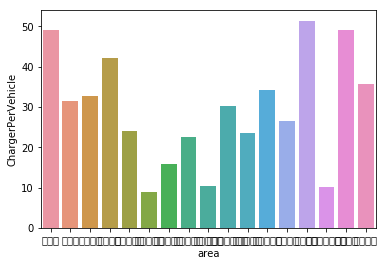

In [68]:
sns.barplot(x='area', y='ChargerPerVehicle', data=frame_1)

#### 1.2 Data Visualization

/Users/baesieun/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Charger Per Vehicle')

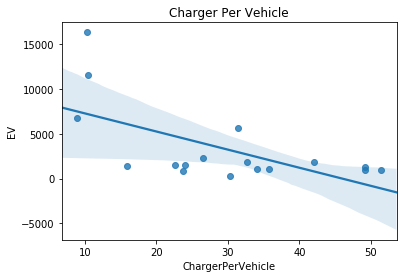

In [69]:
plt.figure()
sns.regplot('ChargerPerVehicle','EV', data=frame_1)
plt.title('Charger Per Vehicle')

### ==> Specific Variable 땅 면적 대비 충전소 대수의 비율이 높은 지역이 전기차 보급률이 높을 것이다.

In [100]:
a_frame = pd.read_excel('area.xlsx')

In [71]:
a_frame.head()

,area,smeasure
0,강원도,16828
1,경기도,10187
2,경상남도,10540
3,경상북도,19033
4,광주광역시,501


In [72]:
frame_1['MPerCharger'] = frame_1['EV']/a_frame['smeasure'].values*100

In [101]:
frame_1.head()

,area,Charger,EV,ChargerPerVehicle,MPerCharger,EVPerMperC
0,강원도,620,1260,49.206349,7.487521,16828.0
1,경기도,1782,5672,31.417489,55.678806,10187.0
2,경상남도,604,1848,32.683983,17.533207,10540.0
3,경상북도,798,1895,42.110818,9.956392,19033.0
4,광주광역시,372,1552,23.969072,309.780439,501.0


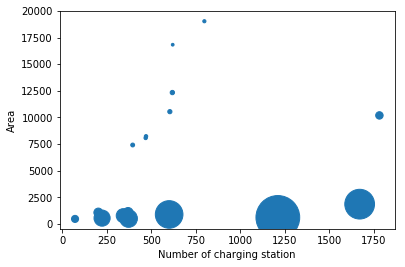

In [74]:
plt.figure()
plt.scatter(frame_1['Charger'],a_frame['smeasure'],s=frame_1['MPerCharger'])
plt.xlabel('Number of charging station')
plt.ylabel('Area')
plt.show()

In [75]:
frame_1['EVPerMperC'] = frame_1['EV']/frame_1['MPerCharger'].values*100

/Users/baesieun/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'MeasurePerCharger Per Electric Vehicle')

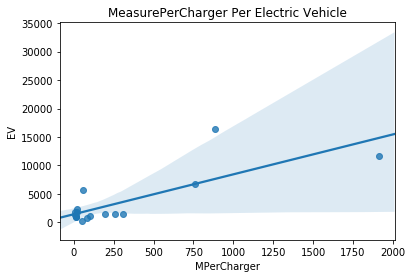

In [77]:
plt.figure()
sns.regplot('MPerCharger','EV', data=frame_1)
plt.title('MeasurePerCharger Per Electric Vehicle')

### [Theory 2]<br>급속충전기 비율이 높은 지역의 전기차 보급률이 높을 것이다.

In [93]:
frame_2 = pd.DataFrame(frame, columns = ['area', 'RapidCharger', 'RatioOfRC','EV'])

In [94]:
frame_2

,area,RapidCharger,RatioOfRC,EV
0,강원도,420,67.7,1260
1,경기도,780,43.7,5672
2,경상남도,317,52.4,1848
3,경상북도,457,57.2,1895
4,광주광역시,126,33.8,1552
5,대구광역시,264,44.0,6738
6,대전광역시,102,45.7,1400
7,부산광역시,121,35.3,1516
8,서울특별시,425,35.0,11580
9,세종특별자치시,32,45.0,234


### Ratio of Rapid Charger

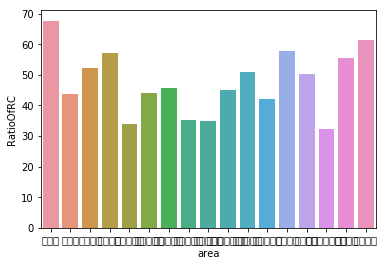

In [99]:
plt.figure()
sns.barplot('area','RatioOfRC', data=frame_2)

### Relationship between MeasurePerRapidCharger and the Number of Electric Vehicle

In [103]:
frame_2['MeasurePerRC'] = frame_2['RapidCharger'] / a_frame['smeasure'] * 1000

In [106]:
frame_2.head()

,area,RapidCharger,RatioOfRC,EV,MeasurePerRC
0,강원도,420,67.7,1260,24.958403
1,경기도,780,43.7,5672,76.568175
2,경상남도,317,52.4,1848,30.075901
3,경상북도,457,57.2,1895,24.010928
4,광주광역시,126,33.8,1552,251.497006


/Users/baesieun/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'MeasurePer Rapid Charger Per Electric Vehicle')

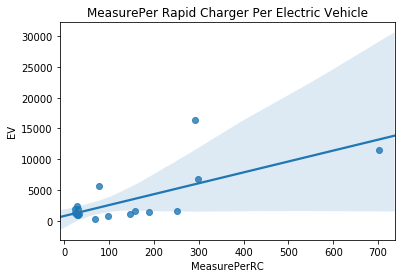

In [105]:
plt.figure()
sns.regplot('MeasurePerRC','EV', data=frame_2)
plt.title('MeasurePer Rapid Charger Per Electric Vehicle')

1. 충전기 대수와 급속충전기 대수 비율 지역별로 구하여 저장한 뒤 시각화
2. 급속 충전기 비율이 높은 곳의 전기차 보급률 확인